# Project 3
## Hanwei Wang

In [88]:
import numpy as np
from numpy.linalg import *
import random
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
from tqdm import tqdm

## Problem 1

$E[X[n]] = \frac n 2 \quad var(X[n]) = \frac n 2$

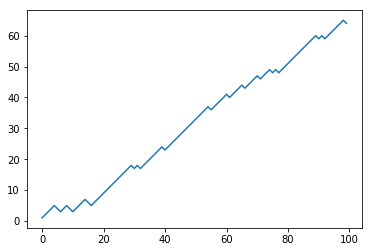

In [7]:
N = 100
X = []
sum = 0
for i in range(N):
    if(random.randint(1,4) == 1):
        sum += -1
        X.append(sum)
    else:
        sum += 1
        X.append(sum)
plt.plot(X)

When $n \rightarrow \infty$, $X[n]\rightarrow \infty$

In [ ]:
PMF??

## Problem 2

In [105]:
M = 10000
a = 0.95
res1 = [0]*50
res2 = [0]*50
for m in range(M):
    U = np.random.normal(0, 1, 50)
    X1 = []
    X2 = []
    X1.append(U[0])
    X2.append(a * np.random.normal(0, np.sqrt(1/(1-a*a)), 1) + U[0])
    for n in range(1,50):
        X1.append(a * X1[n-1] + U[n])
        X2.append(a * X2[n-1] + U[n])
    for i in range(50):
        res1[i] += X1[i]*X1[i]
        res2[i] += X2[i]*X2[i]
for i in range(50):
    res1[i] = res1[i]/M
    res2[i] = res2[i]/M

In [106]:
print("The first set: ")
print("Theoretical: ", 1/(1-a*a), "  Simulation: ", np.mean(res1))
print("The second set: ")
print("Theoretical: ", 1/(1-a*a), "  Simulation: ", np.mean(res2))

The first set: 
Theoretical:  10.256410256410254   Simulation:  8.29707127730036
The second set: 
Theoretical:  10.256410256410254   Simulation:  10.228778169784396


## Problem 3

In [161]:
a = 0.9
b = 0.2
M = 10000
N = 50
res1 = [0]*N
res2 = [0]*N
for _ in range(M):
    U = np.random.normal(0, 1, 50)
    X1 = []
    X2 = []
    X1.append(b * np.random.normal(0, np.sqrt((a-b)*(a-b)/(1-a*a)), 1) + U[0])
    X2.append(a * np.random.normal(0, np.sqrt((a-b)*(a-b)/(1-a*a)), 1) + U[0])
    for n in range(1,N):
        X1.append(a * X1[n-1] + U[n] - b * U[n-1])
        X2.append(b * X2[n-1] + U[n] - a * U[n-1])
    for n in range(N):
        res1[n] += X1[n]*X1[n]
        res2[n] += X2[n]*X2[n]
for i in range(N):
    res1[i] = res1[i]/M
    res2[i] = res2[i]/M

In [162]:
print("The first set: ")
print("Theoretical: ", 1+(a-b)*(a-b)/(1-a*a), "  Simulation: ", np.mean(res1))
print("The second set: ")
print("Theoretical: ", 1+(a-b)*(a-b)/(1-b*b), "  Simulation: ", np.mean(res2))

The first set: 
Theoretical:  3.578947368421053   Simulation:  3.3071454191599368
The second set: 
Theoretical:  1.5104166666666665   Simulation:  1.5441595217474058


## problem 4

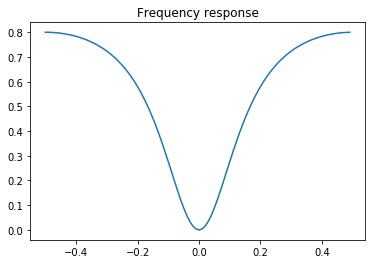

In [163]:
H = []
for f in np.arange(-0.5,0.5,0.01):
    p = 2-2*math.cos(2*math.pi*f)
    H.append(p/(p+1))
    plt.title("Frequency response")
plt.plot(np.arange(-0.5,0.5,0.01),H)

In [164]:
delta = 0.001
L = int(0.5/delta)
mse = 0
for n in range(-L,L):
    p = 2-2*math.cos(2*math.pi*(n*delta))
    mse+=(p/(1+p))*delta
print("minimum MSE =", mse)

minimum MSE = 0.5527864045000418


## Problem 5

In [83]:
M = 10000
a = 0.25
res = [0]*50

U = np.random.normal(0, math.sqrt(0.5), 50)
X = []
S = []
W = []
S.append(a * np.random.normal(0, np.sqrt(1/(1-a*a)), 1) + U[0])
for n in range(1,50):
    S.append(a * S[n-1] + U[n])
W = np.random.normal(0, 1, 50)
X = [S[i] + W[i] for i in range(50)]

In [105]:
Nfft = 1024
Ps = 0.5/(pow(abs(1-a*math.exp(-j*2*math.pi*n/Nfft)),2))
Hf = Ps/(Ps + 1)
sestf = Hf*fft(X,Nfft)
sest = ifft(sestf,Nfft).real

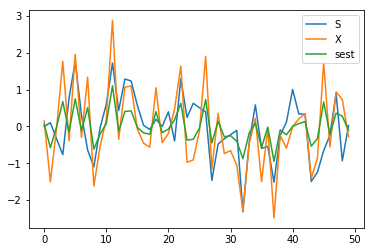

In [107]:
plt.plot(S, label = "S")
plt.plot(X, label = "X")
plt.plot(sest[:,0], label="sest")
plt.legend()

## Problem 6

$X[n] = U[n] - U[n-1]$

In [156]:
M = 10000
N = 50
res = [0]*N
R = [0]*10
for _ in range(M):
    U = np.random.normal(0, 1, N+1)
    X = []
    for n in range(N):
        X.append(U[n] - U[n-1])
    for k in range(10):
        tmp = 0
        count = 0
        i = 0
        while i+k < N:
            tmp += X[i]*X[i+k]
            count += 1
            i+=1
        R[k] += tmp/count
R = [R[i]/M for i in range(10)]

In [160]:
print("Theoretical: ", "[2,-1,0,0,0,0,0,0,0,0]")
print("Simulation: ")
for k in range(10):
    print("Rx(",k,") = ",R[k])

Theoretical:  [2,-1,0,0,0,0,0,0,0,0]
Simulation: 
Rx( 0 ) =  2.0004693467273604
Rx( 1 ) =  -0.9981653479779572
Rx( 2 ) =  -0.0029204975315524433
Rx( 3 ) =  -0.0005303173918233487
Rx( 4 ) =  -0.0003643701224349409
Rx( 5 ) =  0.0003712948188323265
Rx( 6 ) =  0.0018111292929015438
Rx( 7 ) =  0.0012376452311162705
Rx( 8 ) =  -0.0019484282581071375
Rx( 9 ) =  -0.0006855387561284913


## Problem 7

In [146]:
N = 10000
lamb1 = 2
lamb2 = 5
t = 10
res1 = res2 = 0
for _ in range(N):
    time1 = time2 = 0
    while time1 < t:
        time1 += np.random.exponential(1/lamb1)
        res1 += 1
    while time2 < t:
        time2 += np.random.exponential(1/lamb2)
        res2 += 1
print("Arrive rate for lambda = 2: ", res1/t/N)
print("Arrive rate for lambda = 5: ", res2/t/N)

Arrive rate for lambda = 2:  2.0996099999999998
Arrive rate for lambda = 5:  5.09529


## Problem 8

In [49]:
N = 10000
lamb = 1
res = 0
for _ in range(N):
    time = np.sum(np.random.exponential(lamb, size=2))
    if time < 1:
        res+=1
print("Simulation: ", res/N)
print("Theoretical: ", 1-np.exp(-lamb)-np.exp(-lamb))

Simulation:  0.2614
Theoretical:  0.26424111765711533


## Problem 9

In [151]:
N = 100000
res = 0
for _ in range(N):
    signal = 0
    for _ in range(5):
        if np.random.randint(1,10+1) == 1:
            signal = 1-signal
    if signal != 0:
        res+=1
print("P(error) = ", res/N)

P(error) =  0.33551


## Problem 10

In [12]:
N = 10000
bulb = [1,1,1]
TPM = np.zeros((4,4))
sum = np.sum(bulb)
newsum = 0
for _ in range(N):
    if np.random.rand() < 0.5:
        bulb[0] = 0
    if np.random.rand() < 0.5:
        bulb[1] = 0
    if np.random.rand() < 0.5:
        bulb[2] = 0
    if sum == 0:
        bulb = [1,1,1]
    newsum = np.sum(bulb)
    TPM[sum][newsum] += 1
    sum = newsum

In [17]:
for i in range(4):
    tmp = np.sum(TPM[i])
    for j in range(4):
        TPM[i][j] /= tmp
print("Transition Probability Matrix: ")
print(TPM)

Transition Probability Matrix: 
[[0.         0.         0.         1.        ]
 [0.49755255 0.50244745 0.         0.        ]
 [0.25128961 0.4944731  0.25423729 0.        ]
 [0.13299233 0.38618926 0.3697479  0.11107052]]
